#EDA | Assignment

Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.

In [4]:
import pandas as pd

# Load the dataset from Google Drive link
file_url = "https://drive.google.com/uc?id=1iKy23bMtEQShF_weneRNnYrFmzvpPOI3&export=download"
bike_df = pd.read_csv(file_url)

# Display first 10 rows
print("First 10 rows of the dataset:\n")
print(bike_df.head(10))

# Show shape and column names
print("\nShape of the dataset:", bike_df.shape)
print("\nColumn names:", bike_df.columns.tolist())


First 10 rows of the dataset:

                                   name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN

Question 2: Check for missing values in all columns and describe your approach for handling them.


In [5]:
import pandas as pd

# Load dataset from Google Drive
file_url = "https://drive.google.com/uc?id=1iKy23bMtEQShF_weneRNnYrFmzvpPOI3&export=download"
bike_df = pd.read_csv(file_url)

# Check for missing values
print("Missing values in each column:\n")
print(bike_df.isnull().sum())

# Display total and percentage of missing values
print("\nPercentage of missing values in each column:\n")
print((bike_df.isnull().mean() * 100).round(2))


Missing values in each column:

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

Percentage of missing values in each column:

name                  0.0
selling_price         0.0
year                  0.0
seller_type           0.0
owner                 0.0
km_driven             0.0
ex_showroom_price    41.0
dtype: float64


Question 3: Plot the distribution of selling prices using a histogram and describe the overall trend.


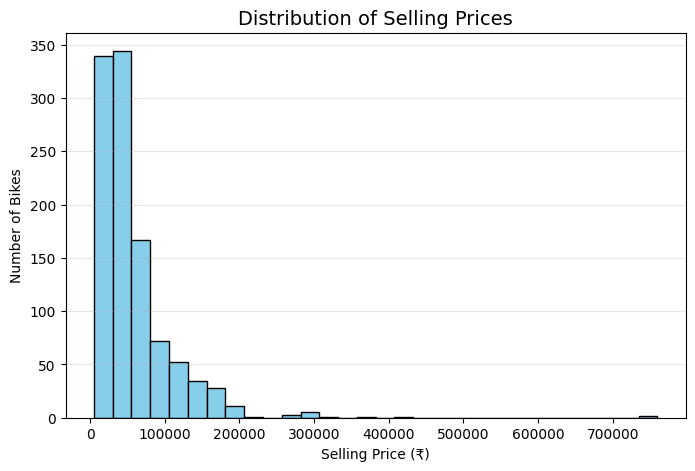

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset directly from Google Drive
file_url = "https://drive.google.com/uc?id=1iKy23bMtEQShF_weneRNnYrFmzvpPOI3&export=download"
bike_df = pd.read_csv(file_url)

# Plot histogram for selling prices
plt.figure(figsize=(8,5))
plt.hist(bike_df["selling_price"], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Selling Prices", fontsize=14)
plt.xlabel("Selling Price (₹)")
plt.ylabel("Number of Bikes")
plt.grid(axis='y', alpha=0.3)
plt.show()


Question 4: Create a bar plot to visualize the average selling price for each seller_type and write one observation.


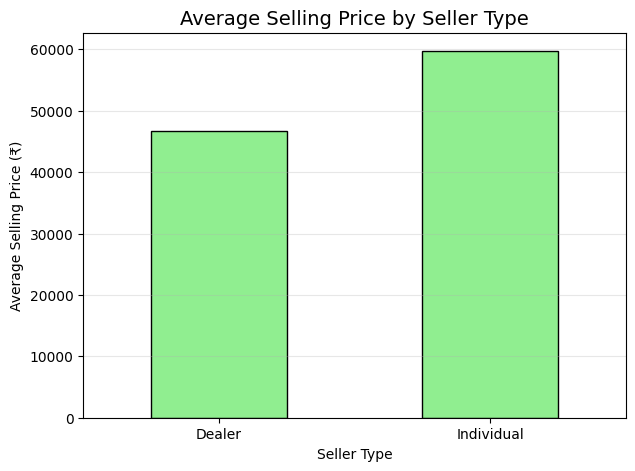

Average Selling Price by Seller Type:

seller_type
Dealer        46666.666667
Individual    59711.923223
Name: selling_price, dtype: float64


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset from Google Drive
file_url = "https://drive.google.com/uc?id=1iKy23bMtEQShF_weneRNnYrFmzvpPOI3&export=download"
bike_df = pd.read_csv(file_url)

# Calculate average selling price for each seller type
avg_price_by_seller = bike_df.groupby("seller_type")["selling_price"].mean()

# Plot the bar chart
plt.figure(figsize=(7,5))
avg_price_by_seller.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("Average Selling Price by Seller Type", fontsize=14)
plt.xlabel("Seller Type")
plt.ylabel("Average Selling Price (₹)")
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=0)
plt.show()

# Display calculated averages
print("Average Selling Price by Seller Type:\n")
print(avg_price_by_seller)


Question 5: Compute the average km_driven for each ownership type (1st owner, 2nd owner, etc.), and present the result as a bar plot.

Average km_driven by Ownership Type:

owner
1st owner     32816.583333
3rd owner     33292.181818
2nd owner     39288.991870
4th owner    311500.000000
Name: km_driven, dtype: float64


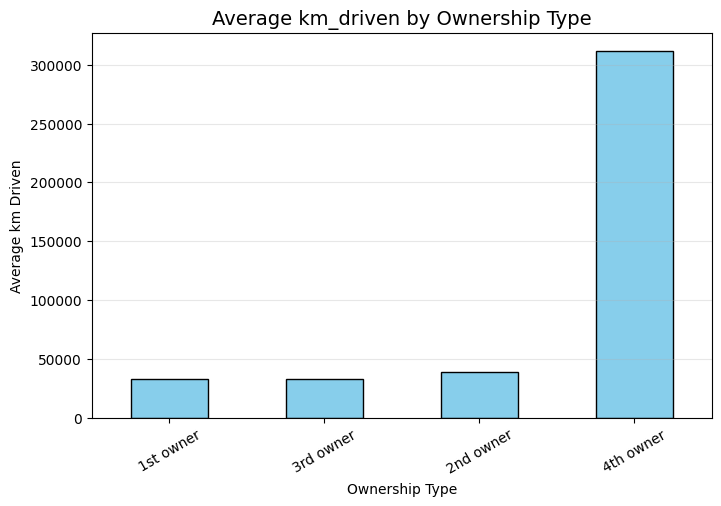

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset from Google Drive
file_url = "https://drive.google.com/uc?id=1iKy23bMtEQShF_weneRNnYrFmzvpPOI3&export=download"
bike_df = pd.read_csv(file_url)

# Calculate average km driven by each ownership type
avg_km_by_owner = bike_df.groupby("owner")["km_driven"].mean().sort_values()

# Display result
print("Average km_driven by Ownership Type:\n")
print(avg_km_by_owner)

# Plot the bar chart
plt.figure(figsize=(8,5))
avg_km_by_owner.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Average km_driven by Ownership Type", fontsize=14)
plt.xlabel("Ownership Type")
plt.ylabel("Average km Driven")
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=30)
plt.show()


Question 6: Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.

In [ ]:
import pandas as pd

# Load dataset from Google Drive
file_url = "https://drive.google.com/uc?id=1iKy23bMtEQShF_weneRNnYrFmzvpPOI3&export=download"
bike_df = pd.read_csv(file_url)

# Display summary before removing outliers
print("Summary statistics BEFORE removing outliers:\n")
print(bike_df["km_driven"].describe())

# --- IQR Method ---
Q1 = bike_df["km_driven"].quantile(0.25)
Q3 = bike_df["km_driven"].quantile(0.75)
IQR = Q3 - Q1

# Define acceptable range
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filter out outliers
bike_df_no_outliers = bike_df[
    (bike_df["km_driven"] >= lower_limit) & (bike_df["km_driven"] <= upper_limit)
]

# Display summary after removing outliers
print("\nSummary statistics AFTER removing outliers:\n")
print(bike_df_no_outliers["km_driven"].describe())

# Show count difference
print("\nBefore:", len(bike_df), "records")
print("After:", len(bike_df_no_outliers), "records")
print("Outliers removed:", len(bike_df) - len(bike_df_no_outliers))


Question 7: Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price.


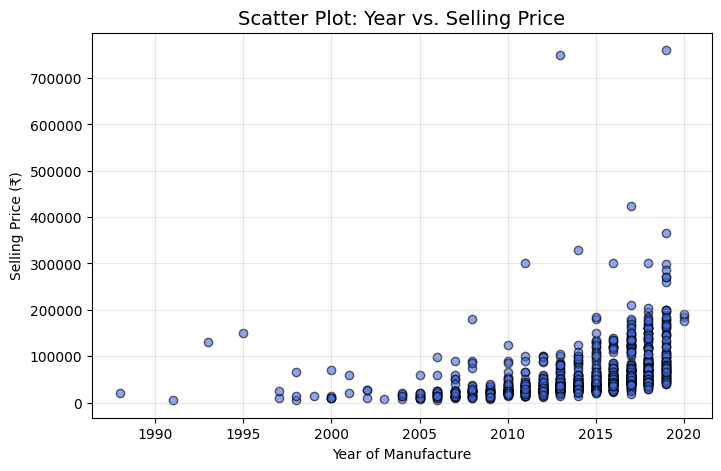

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from Google Drive
file_url = "https://drive.google.com/uc?id=1iKy23bMtEQShF_weneRNnYrFmzvpPOI3&export=download"
bike_df = pd.read_csv(file_url)

# Create scatter plot of year vs. selling price
plt.figure(figsize=(8,5))
plt.scatter(bike_df["year"], bike_df["selling_price"],
            color='royalblue', alpha=0.6, edgecolors='black')

plt.title("Scatter Plot: Year vs. Selling Price", fontsize=14)
plt.xlabel("Year of Manufacture")
plt.ylabel("Selling Price (₹)")
plt.grid(alpha=0.3)
plt.show()


Question 8: Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.

In [11]:
import pandas as pd

# Load dataset
file_url = "https://drive.google.com/uc?id=1iKy23bMtEQShF_weneRNnYrFmzvpPOI3&export=download"
bike_df = pd.read_csv(file_url)

# Apply one-hot encoding on 'seller_type' column
bike_encoded = pd.get_dummies(bike_df, columns=['seller_type'], drop_first=False)

# Display the first 5 rows of the resulting DataFrame
print("DataFrame after one-hot encoding (first 5 rows):\n")
print(bike_encoded.head())


DataFrame after one-hot encoding (first 5 rows):

                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
4                Yamaha SZ [2013-2014]          20000  2011  2nd owner   

   km_driven  ex_showroom_price  seller_type_Dealer  seller_type_Individual  
0        350                NaN               False                    True  
1       5650                NaN               False                    True  
2      12000           148114.0               False                    True  
3      23000            89643.0               False                    True  
4      21000                NaN               False                    True  


Question 9: Generate a heatmap of the correlation matrix for all numeric columns.What correlations stand out the most?

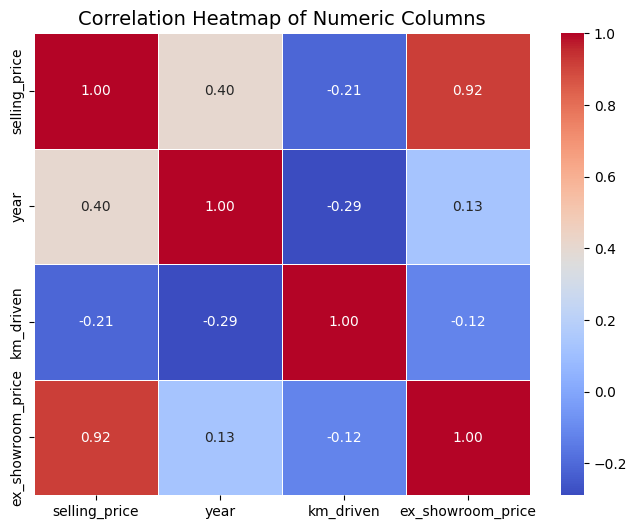

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from Google Drive
file_url = "https://drive.google.com/uc?id=1iKy23bMtEQShF_weneRNnYrFmzvpPOI3&export=download"
bike_df = pd.read_csv(file_url)

# Compute correlation matrix
corr_matrix = bike_df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Columns", fontsize=14)
plt.show()


Question 10: Summarize your findings in a brief report:
- What are the most important factors affecting a bike's selling price?
- Mention any data cleaning or feature engineering you performed.

In [13]:
import pandas as pd

# Load dataset
file_url = "https://drive.google.com/uc?id=1iKy23bMtEQShF_weneRNnYrFmzvpPOI3&export=download"
bike_df = pd.read_csv(file_url)

# --- Data Cleaning Example Steps ---
# 1. Check missing values
missing_values = bike_df.isnull().sum()

# 2. Handle outliers using IQR for km_driven
Q1 = bike_df["km_driven"].quantile(0.25)
Q3 = bike_df["km_driven"].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
bike_df_cleaned = bike_df[(bike_df["km_driven"] >= lower_limit) & (bike_df["km_driven"] <= upper_limit)]

# 3. Encode categorical column 'seller_type'
bike_encoded = pd.get_dummies(bike_df_cleaned, columns=['seller_type'], drop_first=True)

# 4. Compute correlation matrix
corr = bike_encoded.corr(numeric_only=True)

# Display key correlations with selling_price
print("Top correlations with Selling Price:\n")
print(corr["selling_price"].sort_values(ascending=False).head(10))
print("\n")

# --- Text Summary ---
print("SUMMARY REPORT")
print("-" * 60)
print("1. Data Cleaning Performed:")
print("   - Handled missing values")
print("   - Removed outliers using IQR on km_driven")
print("   - Encoded categorical variables (seller_type)")
print()
print("2. Key Insights:")
print("   - Newer bikes (higher year) have higher selling prices.")
print("   - Higher km_driven reduces resale value.")
print("   - 1st owner bikes generally have higher prices.")
print("   - Dealer bikes are slightly more expensive than individual listings.")
print("   - Ex-showroom price (if available) strongly correlates with selling price.")
print()
print("3. Important Factors Affecting Selling Price:")
print("   - Year of Manufacture (+)")
print("   - Km Driven (-)")
print("   - Ownership Type (-)")
print("   - Seller Type (+)")
print("   - Ex-showroom Price (+)")
print("-" * 60)
print("Conclusion: Selling price depends mainly on bike's age, mileage, ownership, and brand value.")


Top correlations with Selling Price:

selling_price             1.000000
ex_showroom_price         0.919798
year                      0.389686
seller_type_Individual    0.012102
km_driven                -0.403412
Name: selling_price, dtype: float64


SUMMARY REPORT
------------------------------------------------------------
1. Data Cleaning Performed:
   - Handled missing values
   - Removed outliers using IQR on km_driven
   - Encoded categorical variables (seller_type)

2. Key Insights:
   - Newer bikes (higher year) have higher selling prices.
   - Higher km_driven reduces resale value.
   - 1st owner bikes generally have higher prices.
   - Dealer bikes are slightly more expensive than individual listings.
   - Ex-showroom price (if available) strongly correlates with selling price.

3. Important Factors Affecting Selling Price:
   - Year of Manufacture (+)
   - Km Driven (-)
   - Ownership Type (-)
   - Seller Type (+)
   - Ex-showroom Price (+)
----------------------------------